In [1]:
# Importing data handling libraries
import pandas as pd
import numpy as np

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# Importing XGBoost and LightGBM
import xgboost as xgb

# Setting visualization style
sns.set(style="whitegrid")


In [2]:
# Reading the dataset into a pandas DataFrame
data = pd.read_csv('/kaggle/input/dataset/creditcard.csv')

# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Getting information about the dataset
print(data.info())

# Getting statistical summary of the numerical columns in the dataset
print(data.describe())

# Checking for missing values in each column
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Checking for missing values in each column
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])  # This will print only columns with missing values

Series([], dtype: int64)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


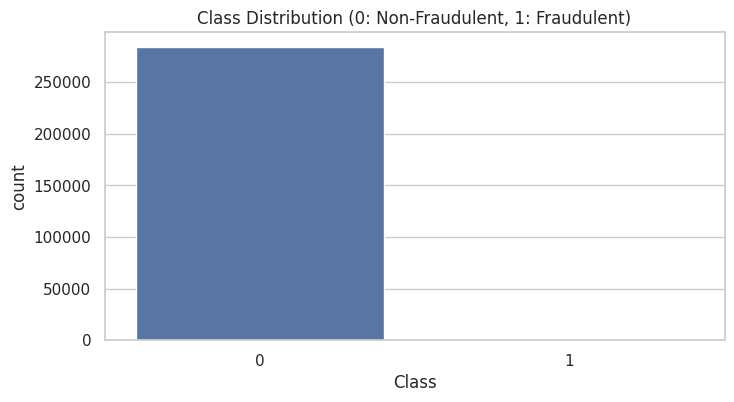

In [5]:
# Checking the balance of classes in the 'Class' column
class_distribution = data['Class'].value_counts(normalize=True)  # normalize=True gives the proportions
print(class_distribution)

# Visualizing class imbalance
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Non-Fraudulent, 1: Fraudulent)')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and 'Class' is the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)



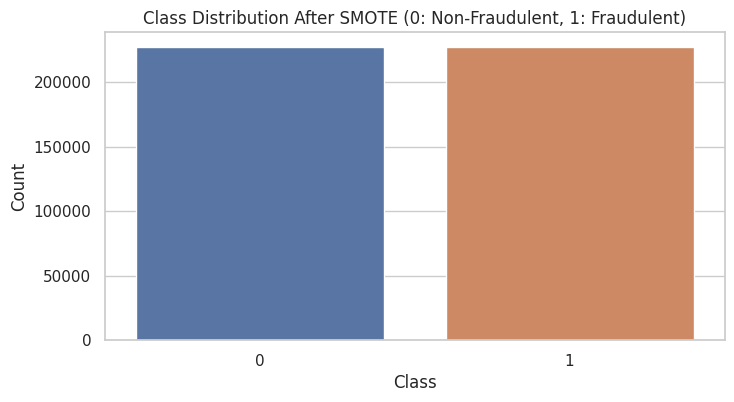

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train_smote is your resampled target array from SMOTE
class_distribution_smote = pd.Series(y_train_smote).value_counts()

# Plotting the class distribution after SMOTE
plt.figure(figsize=(8, 4))
sns.barplot(x=class_distribution_smote.index, y=class_distribution_smote.values)
plt.title('Class Distribution After SMOTE (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the resampled training data and transform it
X_train_smote_scaled = scaler.fit_transform(X_train_smote)

# Transform the test data with the same scaler
X_test_scaled = scaler.transform(X_test_scaled)

In [9]:
X_train_smote_scaled

array([[ 1.57515502,  0.76629518, -0.71360284, ..., -0.00463182,
        -0.18431066, -0.39224065],
       [ 0.77146142,  0.78237363, -0.51862091, ..., -0.08236652,
        -0.26973469, -0.41128633],
       [-1.01627495,  0.23181727, -0.33792985, ..., -0.04560154,
         0.32141099,  0.34574629],
       ...,
       [ 1.53173283,  0.12976751,  0.07016636, ...,  0.39789625,
         0.77806902, -0.30368777],
       [-0.27889216, -0.41746959,  0.20707148, ..., -1.40501336,
         2.74255823, -0.41942313],
       [-1.30799671, -4.324114  ,  3.58319268, ...,  1.34195784,
         0.82679127,  0.01537199]])

In [10]:
X_test_scaled

array([[ 1.55027705,  0.289555  , -0.11488661, ...,  0.4674374 ,
         0.56772889, -0.32327156],
       [-1.47442452, -0.10245511, -1.27130584, ...,  0.0296829 ,
        -1.29921456, -0.37231527],
       [-0.00452083, -0.23825936,  0.13736438, ...,  0.48665755,
         1.07544057, -0.08984107],
       ...,
       [ 1.66425635,  0.22166717, -0.31522172, ..., -0.06702308,
         0.22796105, -0.3523459 ],
       [ 1.61529462,  0.80507612, -0.80551997, ..., -0.08762859,
        -0.24129731, -0.3366871 ],
       [-0.80443658,  0.63558185, -0.67224206, ..., -0.05931637,
         0.00725484, -0.16096545]])

In [11]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight='balanced', C=1.0, random_state=42)

# Train the model on the scaled resampled data
svm_classifier.fit(X_train_smote_scaled, y_train_smote)

# Predict on the scaled test data
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model as previously outlined
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM on normalized test data: {:.2f}%".format(accuracy * 100))

# You can reuse the confusion matrix and classification report code here
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy of SVM on normalized test data: 99.30%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.80      0.28        98

    accuracy                           0.99     56962
   macro avg       0.59      0.89      0.64     56962
weighted avg       1.00      0.99      1.00     56962



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.80      0.28        98

    accuracy                           0.99     56962
   macro avg       0.59      0.89      0.64     56962
weighted avg       1.00      0.99      1.00     56962



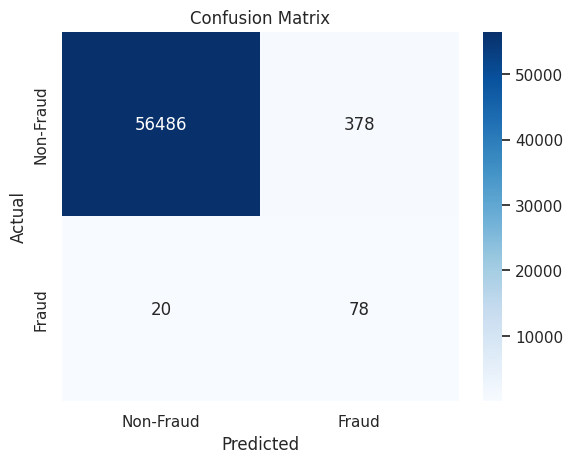

In [12]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Display the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.title('Confusion Matrix')
plt.show()


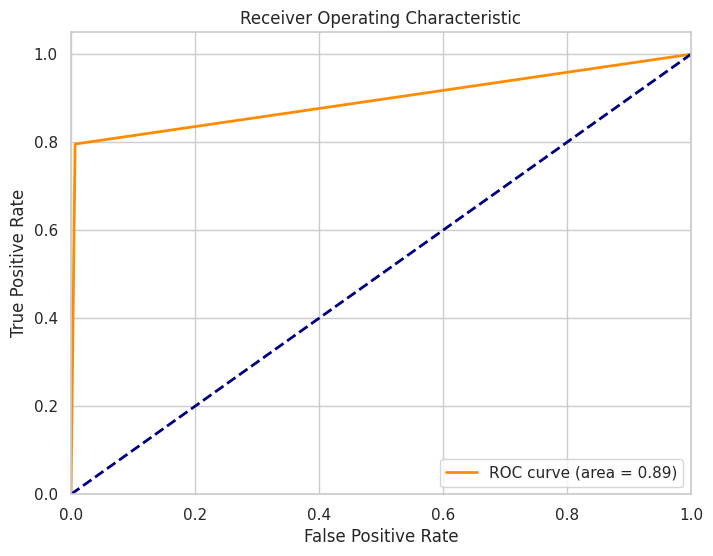

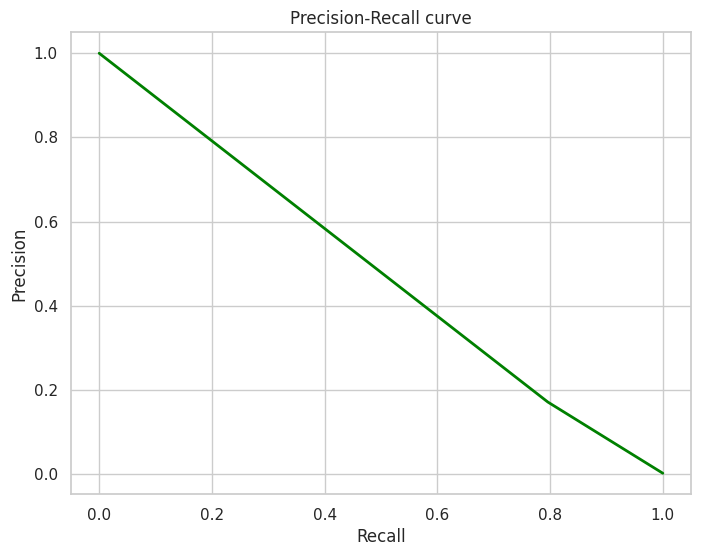

In [13]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you've already predicted y_pred and have y_test ready from your SVM model

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train_smote_scaled and X_test_scaled are your features, and y_train_smote and y_test are the labels

# Build the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_smote_scaled.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote_scaled, y_train_smote, epochs=50, batch_size=256, validation_split=0.2, verbose=1)

# Save the model
model.save('fraud_detection_model.h5')


2024-08-05 08:56:12.878529: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 08:56:12.878700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 08:56:13.030169: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9671 - loss: 0.0910 - val_accuracy: 0.9990 - val_loss: 0.0044
Epoch 2/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9974 - loss: 0.0095 - val_accuracy: 0.9997 - val_loss: 0.0021
Epoch 3/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9983 - loss: 0.0065 - val_accuracy: 0.9998 - val_loss: 0.0017
Epoch 4/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9987 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 6/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 7/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9993 - val_loss: 0.0019
Epoch 8/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9991 - loss: 0.0036 -

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,461 (576.02 KB)

 Trainable params: 49,153 (192.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 98,308 (384.02 KB)

In [15]:
# Predict probabilities and classes
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model on test data: {accuracy:.2f}')


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy of the model on test data: 1.00


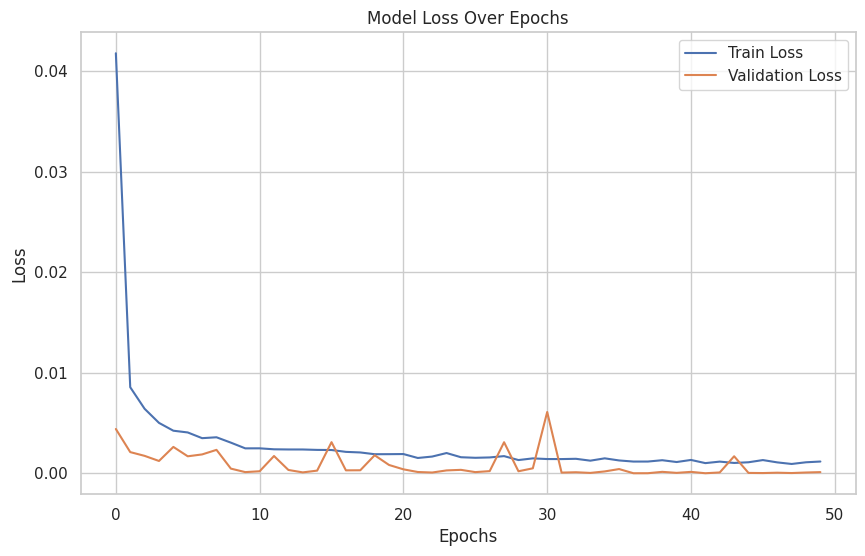

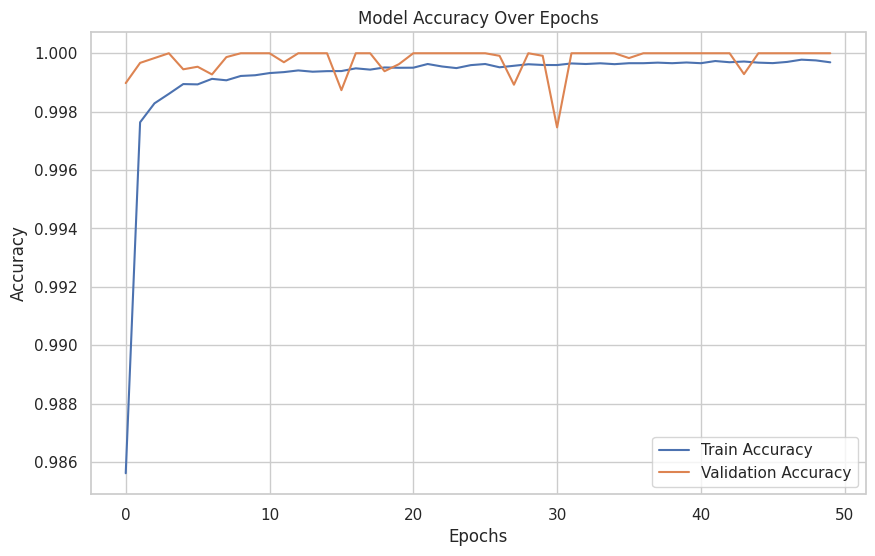

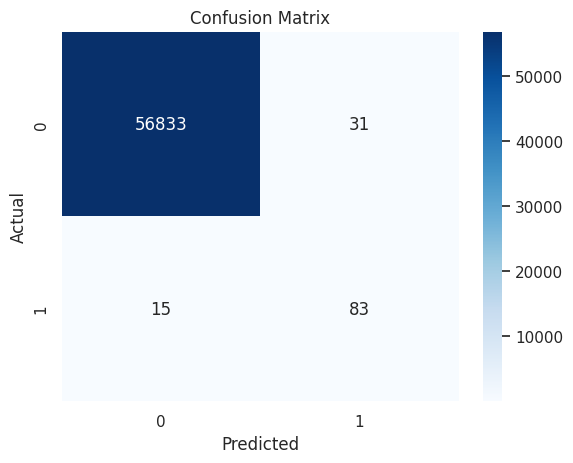

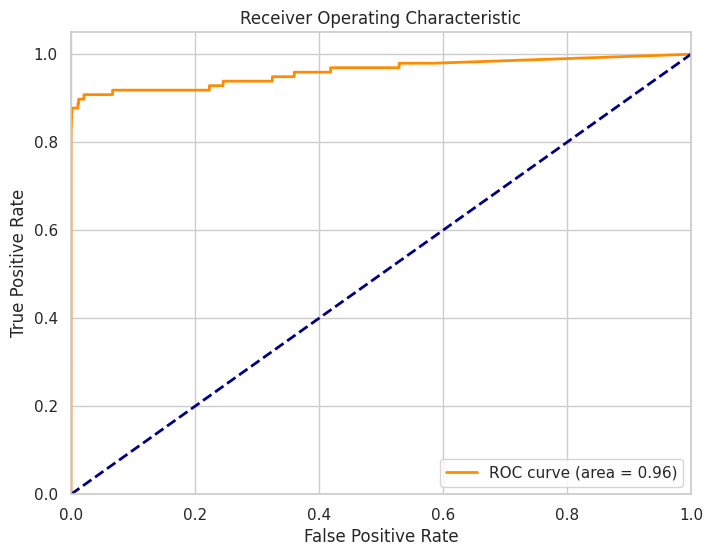

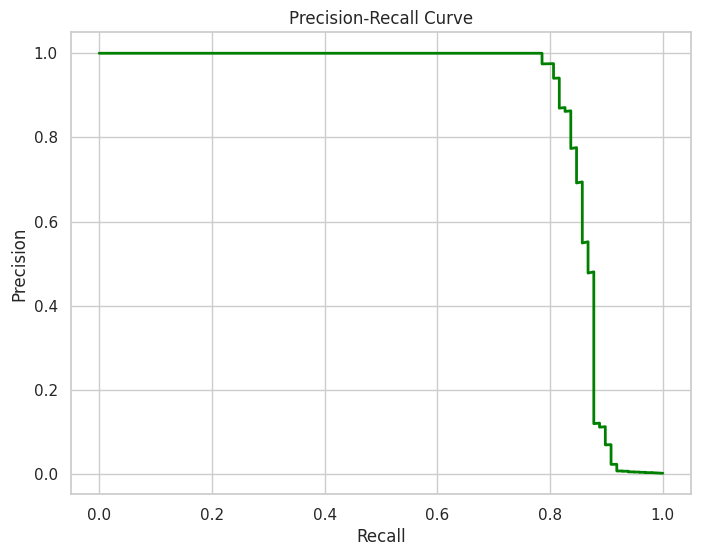

In [16]:
# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


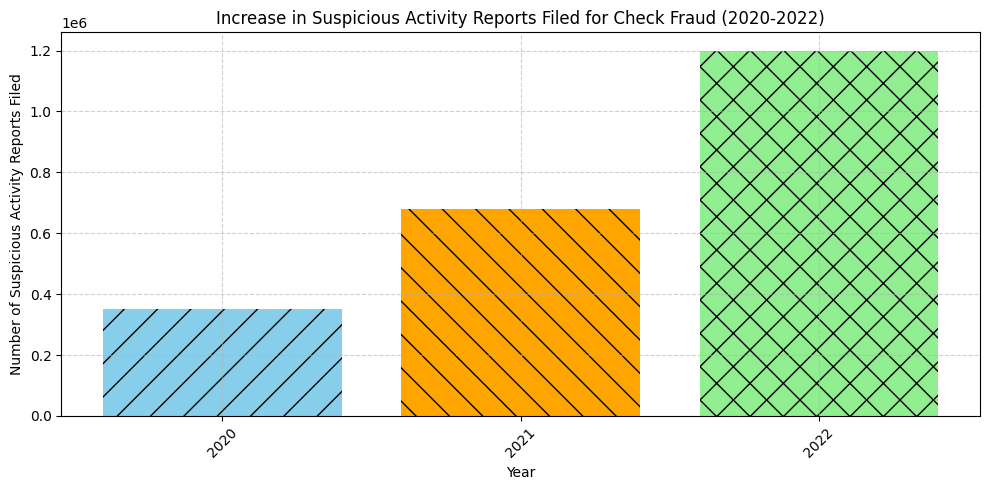

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Year': ['2020', '2021', '2022'],
    'SARs Filed': [350000, 680000, 1200000]  # Assuming hypothetical data for 2022
}

df = pd.DataFrame(data)

# Colors
colors = ['skyblue', 'orange', 'lightgreen']

# Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(df['Year'], df['SARs Filed'], color=colors)

# Adding a pattern to the bars
patterns = ['/', '\\', 'x']
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.xlabel('Year')
plt.ylabel('Number of Suspicious Activity Reports Filed')
plt.title('Increase in Suspicious Activity Reports Filed for Check Fraud (2020-2022)')
plt.grid(True, linestyle='--', alpha=0.6)  # Make grid less prominent
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


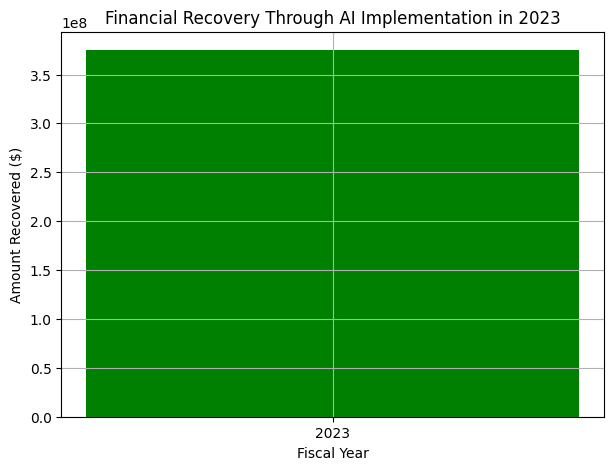

In [4]:
# Data
years = ['2023']
recovery_amounts = [375000000]  # $375 million recovered in 2023

# Plotting
plt.figure(figsize=(7, 5))
plt.bar(years, recovery_amounts, color='green')
plt.xlabel('Fiscal Year')
plt.ylabel('Amount Recovered ($)')
plt.title('Financial Recovery Through AI Implementation in 2023')
plt.grid(True)
plt.show()

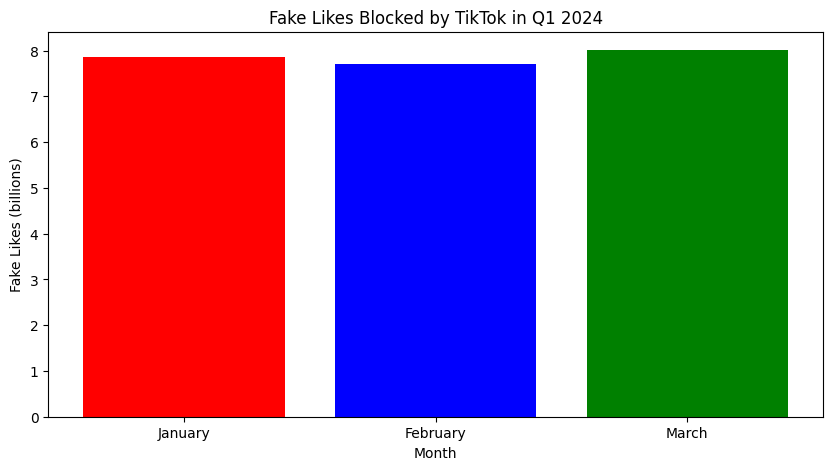

In [6]:
import matplotlib.pyplot as plt

months = ['January', 'February', 'March']
fake_likes = [7.86, 7.71, 8.01]  # Hypothetical monthly breakdown of the 23.58 billion

plt.figure(figsize=(10, 5))
plt.bar(months, fake_likes, color=['red', 'blue', 'green'])
plt.xlabel('Month')
plt.ylabel('Fake Likes (billions)')
plt.title('Fake Likes Blocked by TikTok in Q1 2024')
plt.show()
import numpy as np

categories = ['Malware', 'Phishing', 'Credential Stuffing']
percentages = [30, 45, 25]  # Example percentages

y_pos = np.arange(len(categories))

plt.figure(figsize=(10, 5))
plt.barh(y_pos, percentages, align='center', alpha=0.5, color=['orange', 'purple', 'cyan'])
plt.yticks(y_pos, categories)
plt.xlabel('Percentage of Businesses Affected')
plt.title('Types of Cyber Attacks Experienced Worldwide, February 2024')
plt.show()


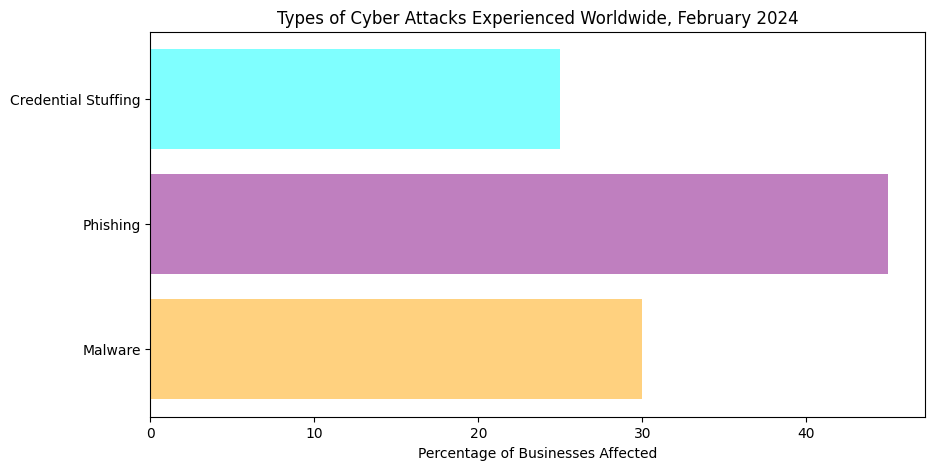

In [7]:
import numpy as np

categories = ['Malware', 'Phishing', 'Credential Stuffing']
percentages = [30, 45, 25]  # Example percentages

y_pos = np.arange(len(categories))

plt.figure(figsize=(10, 5))
plt.barh(y_pos, percentages, align='center', alpha=0.5, color=['orange', 'purple', 'cyan'])
plt.yticks(y_pos, categories)
plt.xlabel('Percentage of Businesses Affected')
plt.title('Types of Cyber Attacks Experienced Worldwide, February 2024')
plt.show()